In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [13]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))

    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))

    restults_df = pd.DataFrame.from_dict(results_dict, orient='index',
                                        columns=['RMSE', 'MAE','R2'])

    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()

    return restults_df




In [14]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,XGBoost,25920.433603,19914.833333,0.976293
1,RandomForest,18514.827054,15572.500000,0.987904
2,LinearRegression,16221.040791,12433.000000,0.990716
3,ARIMA,14959.893465,11265.335750,0.983564
4,LSTM,12738.863794,9547.916667,0.994274


Plot Results

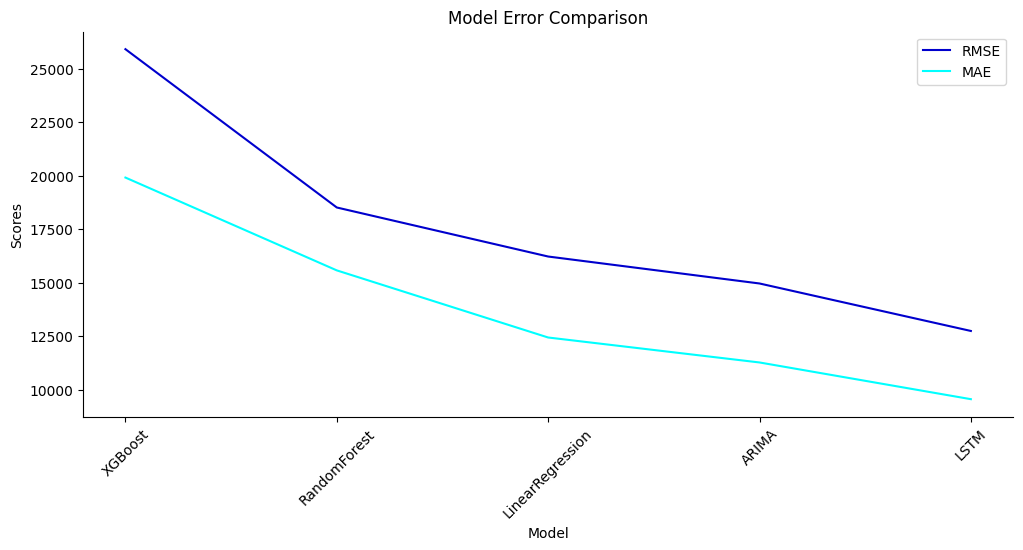

In [20]:
def plot_results(results_df):
    # Create a plot
    fig, ax = plt.subplots(figsize=(12, 5))

    # Plot RMSE and MAE with explicit x and y arguments
    sns.lineplot(x=np.arange(len(results_df)), y=results_df['RMSE'], ax=ax, label='RMSE', color='mediumblue')
    sns.lineplot(x=np.arange(len(results_df)), y=results_df['MAE'], ax=ax, label='MAE', color='cyan')

    # Rotate x-axis labels and use 'index' column for labels
    plt.xticks(np.arange(len(results_df)), rotation=45)
    ax.set_xticks(np.arange(len(results_df)))
    ax.set_xticklabels(results_df['index'])

    # Add labels and title
    ax.set(xlabel="Model", ylabel="Scores", title="Model Error Comparison")

    # Remove top and right spines for cleaner look
    sns.despine()

    # Save plot in Colab environment
    plt.savefig('/content/compare_models.png')
    plt.show()


    # Call the function
plot_results(results)


In [21]:
average_monthly_sales = 894478 #see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
